# Seaborn vs raw Matplotlib: a user experience

1. What is Seaborn
2. User experience
3. Test case: visualization of the esgf1_dkrz node statistics
    - Comparison of basic performance: bar plot
    - Comparison of advance performance: regression
4. Seaborn-like interactive visualization with Plot.ly


## 1. What is seaborn
+ Seaborn is Python data visualization open source library https://seaborn.pydata.org/
+ **Seaborn is a group of predefined functions that simplify the use of advance plotting capabilities**
+ Seaborn is based on Matplotlib, the basis for static plotting in Python. Matplotlib is able to plot anything https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.figure.html. Matplotlib makes simple and quick basic plots (bar plots, histograms, scatter plots,...) but it can be very verbose and complex to implement for more complex plots (regressions, heat maps,...). Seaborn provides predefined functions to create such advanced plots. Seaborn can also integrate Matplotlib functions to further customize the Seaborn functions but there are trade-offs (see below)
+ Seaborn was created by Michael Waskom, a postdoc in neuroscience at the New York University https://www.cns.nyu.edu/~mwaskom/. He is also the official maintainer https://pypi.org/project/seaborn/ and he solves questions in stackoverflow.com. He also contributed to other open source software development
https://github.com/mwaskom.
+ Seaborn is well-known in the community: it is popular in data science on-line courses and Youtube tutorials since 2015

## 2. User experience
User experience in Ubuntu 18 on-prem (Lenovo ThinkPad X1 Carbon)
+ Installation: uncomplicated via 'conda install seaborn' (I installed the version 0.9.0 realeased on Jul 16, 2018)
+ Dependencies: very popular packages: numpy, scipy, matplotlib, and pandas
+ Hands-on: easy http://seaborn.pydata.org/tutorial.html
+ Performance (see examples below):  

    - nice gallery of templates (although reduced with respect to the matplotlib gallery) 
    - nice documentation
    - basic plots are similar to raw Matplotlib basic plots
    - easy to use predefined very aestethic advance plots

+ Trade-offs: using Seaborn could rather complicate further customizations and less documentation is available compared to Matplotlib; there are also debugging limitations due to untraceable calls behind the scenes

+ **Conclusion**: it is nice to use the Seaborn predefined plots as long as one does not try to substantially modify them, otherwise there are drawbacks.


## 3. Test case: visualization of the esgf1_dkrz node statistics 
Data downloaded from the ESGF Dashboard on the 11.06.2019
http://esgf-ui.cmcc.it:8080/esgf-dashboard-ui/pages/cross-project.html

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # just to solve a legend issue
import seaborn as sns

# to render the figures in the notebook
%matplotlib inline 

# data load
filename = '/home/moreno/Desktop/Movidas/IS-ENES/KPIs/dashboard/11_06_2019_esgf1_dkrz_downloads_by_time.csv' 
esgf1_dkrz = pd.read_csv(filename)

# data wrangling
esgf1_dkrz.index = pd.Series([10,11,1,2,3,4,5,6,7,8,9]) 
esgf1_dkrz = esgf1_dkrz.sort_index() # to sort the data by time

esgf1_dkrz.head()

,number_of_downloads,number_of_successful_downloads,number_of_replica_downloads,total_size_(GB),month,year
1,52551,45219,0,18778.659152,4,2017
2,68318,41648,0,26671.655071,5,2017
3,74513,41492,0,30772.041449,6,2017
4,62612,53173,0,19672.516698,7,2017
5,114200,54636,0,38364.431474,8,2017


In [5]:
# to shorten the variables name
downloads            = esgf1_dkrz.number_of_downloads
successful_downloads = esgf1_dkrz.number_of_successful_downloads
total_size           = esgf1_dkrz['total_size_(GB)'] 
index                = esgf1_dkrz.index

### Comparison of basic performance: bar plots

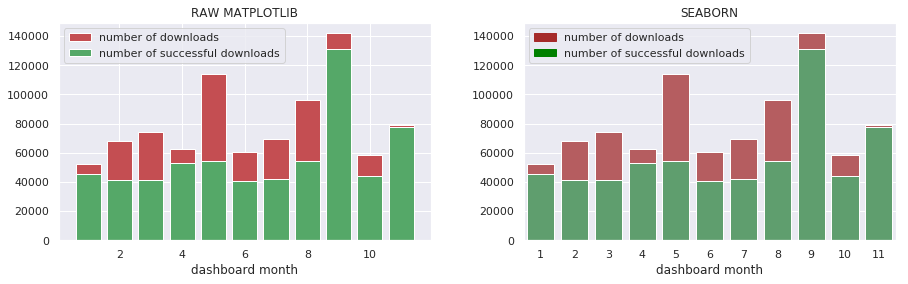

In [6]:
# visualization settings 
sns.set() # default aestetic for the color palette, background,..
plt.rcParams["figure.figsize"] = (15, 4) # (w, h)
plt.subplots_adjust(wspace = 0.25)

# RAW MATPLOTLIB
plt.subplot(121)
plt.bar(index,downloads,color = 'r', label = 'number of downloads') 
plt.bar(index,successful_downloads,color = 'g', label = 'number of successful downloads')  
plt.xlabel('dashboard month')
plt.title('RAW MATPLOTLIB')
plt.legend()

# SEABORN
plt.subplot(122)
sns.barplot(np.array(index), np.array(downloads), data = esgf1_dkrz, color = 'r')
sns.barplot(np.array(index), np.array(successful_downloads), data = esgf1_dkrz, color = 'g')
plt.xlabel('dashboard month')
plt.title('SEABORN')

# seaborn legend issues
red_patch = mpatches.Patch(color='brown', label='number of downloads')
green_patch = mpatches.Patch(color='green', label='number of successful downloads')
plt.legend(handles=[red_patch,green_patch])

Both plots look pretty much the same. I just could not figure out how to add the legend of two bar plots in Seaborn so I created a patch.

### Comparison of advance performance: regression

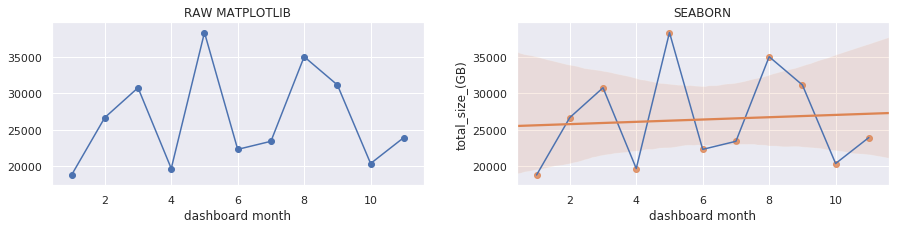

In [8]:
# visualization settings
plt.rcParams["figure.figsize"] = (15, 3) # (w, h)
plt.subplots_adjust(wspace = 0.25)
    
# RAW MATPLOTLIB
plt.subplot(121)
plt.title('RAW MATPLOTLIB')
plt.xlabel('dashboard month')
plt.plot(index,total_size)
plt.scatter(index,total_size)

# SEABORN
plt.subplot(122)
plt.title('SEABORN')
plt.xlabel('dashboard month')
sns.lineplot(index,total_size)
sns.regplot(np.array(index), y = "total_size_(GB)", data = esgf1_dkrz) 

**PROS**: Seaborn is clever with not sorted index (check it by commenting the sorting line code in the data wrangling part at the beginning of the script) and automatically adds the y label, the scatter, the regression, and the confidence interval.

**CONS**: deprecated untreaceble issues with the Seaborn function lineplot (a warning appears when this cell is run for first time).

### Advance: combine plots

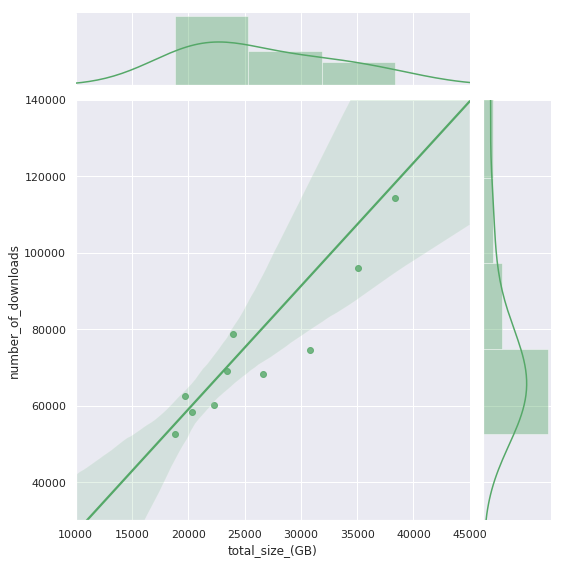

In [8]:
sns.jointplot(x = "total_size_(GB)", y = "number_of_downloads", data = esgf1_dkrz, kind="reg",
                  xlim=(10000, 45000), ylim=(30000, 140000), color="g", height = 8)

**PROS**: it would take a while to figure it out how to create these combined plot in raw Matplotlib; Seaborn also adds the y labels, the scatter, the regression, the confidence interval, and the probability density functions (calculated as a kernel density estimate) automatically.

**CONS**: I could not add the next plot to the right of this one, problems with the plot combination, probably related to the figure-level vs axes-level functions Seaborn feature http://seaborn.pydata.org/introduction.html?highlight=axes%20level#figure-level-and-axes-level-functions.

## 4. Seaborn-like interactive visualization in Plotly

Plot.ly is an open source Python library comprising a JSON-based plot tool for interactive visualization to create interactive plots (also in .html) for dahboards and web applications (also querying databases). One can build Flask applications to deploy Plot.ly by using Dash framework (not shown here).

In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.plotly as py
import plotly.graph_objs as go 
import plotly

# to plot offline (no account request) and save locally
plotly.offline.init_notebook_mode(connected=True)

def slider(esgf1_dkrz, title):

    trace_number_of_downloads = go.Scatter(x=list(esgf1_dkrz.index),
                            y=list(esgf1_dkrz.number_of_downloads),
                            name='Number of downloads',
                            line=dict(color='#3FA65F'))
  
    trace_number_of_successful_downloads = go.Scatter(x=list(esgf1_dkrz.index),
                            y=list(esgf1_dkrz.number_of_successful_downloads),
                            name='Number of successful downloads',
                            line=dict(color='#F06A6A'))
    
    trace_total_size = go.Scatter(x=list(esgf1_dkrz.index),
                            y=list(esgf1_dkrz['total_size_(GB)']),
                            name='Total size (GB)',
                            line=dict(color='#3FA65F'))
    
    # problem selecting both from beginning
    data = [trace_number_of_downloads]
    
    # invoke update function get new values of x and y then relayout 
    updatemenus = list([
    dict(
        buttons=list([   
            dict(label = 'Number of downloads',
                 method = 'update',
                 args = [{'y': [esgf1_dkrz.number_of_downloads]},
                         {'title': 'Number of downloads'}]),
           
             dict(label = 'Number of successful downloads',
                 method = 'update',
                 args = [{'y': [esgf1_dkrz.number_of_successful_downloads]},
                         {'title': 'Number of successful downloads'}]),
            
             dict(label = 'Total size (GB)',
                 method = 'update',
                 args = [{'y': [esgf1_dkrz['total_size_(GB)']]},
                         {'title': 'Total size (GB)'}]),
        ]),
        direction = 'down',
        pad = {'r': 10, 't': 10},
        showactive = True,
        xanchor = 'left',
        yanchor = 'top'
    )
])  
    
    layout = dict(updatemenus=updatemenus,
                  title=title,
                  xaxis = {'title': 'dashboard month'}
              )

    fig = dict(data=data, layout=layout)
    return fig

fig = slider(esgf1_dkrz, 'ESGF DKRZ NODE 1')
plotly.offline.iplot(fig)

The following example shows a **Seaborn-like** interactive plot:

In [10]:
import plotly.figure_factory as ff

# to plot offline (no account request) and save locally
plotly.offline.init_notebook_mode(connected = True)

# figure
fig = ff.create_2d_density(total_size, successful_downloads, point_size = 8, title = 'ESGF NODE 1 DKRZ')

plotly.offline.iplot(fig)

This example shows the relevance of Seaborn in the community since Plot.ly has documentation about how to resamble Seaborn features (find more here https://plot.ly/python/statistical-charts/).